# Assessed Problem #2

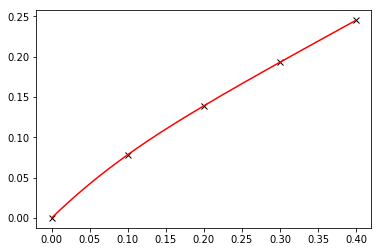

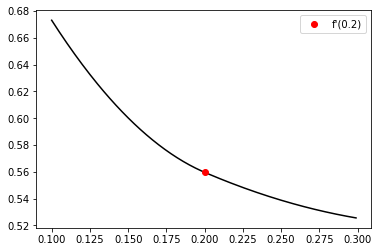

0.559635671138


In [1]:
#Numerical Differentiation
#part 2a)

#Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, barycentric_interpolate
#

#Define Subroutines
def diff(f,x,h=0.00000000001):
    return (f(x+h)-f(x-h))/2/h
#
#Define Raw data
x = [0.     , 0.1     , 0.2    , 0.3    , 0.4    ]
y = [0.000000,0.078348,0.138910,0.192916,0.244981]
#

x0 = np.arange(0.,0.4,0.001)
f_cubic  = interp1d(x,y, kind = 'cubic')
y0 = barycentric_interpolate(x,y,x0)

plt.plot(x,y,'kx')
plt.plot(x0,f_cubic(x0), 'r-')
plt.show()

z  = np.arange(0.1,0.3,0.001)
z0 = diff(f_cubic,z)
plt.plot(z,z0,'k-', markersize = 10)
plt.plot(0.2,diff(f_cubic,0.2),'ro',markersize=6, label = "f'(0.2)")
plt.legend()
plt.show()
print (diff(f_cubic,0.2))

$part \ 2b)$

Error on g(x) is 5.91e-04
Error on G(x) is 4.04e-08


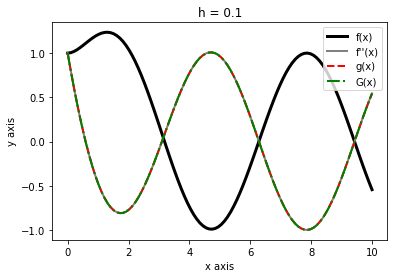

Error on g(x) is 1.47e-02
Error on G(x) is 2.51e-05


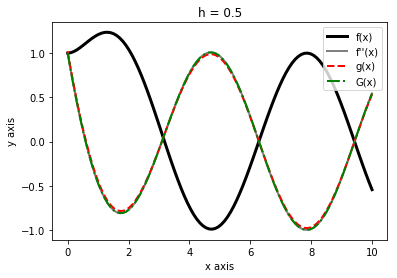

In [3]:
#Define Subroutines
def f(x):
    return np.sin(x) + np.exp(-x)
def df(x):
    return -np.sin(x) + np.exp(-x)
def g(x,h):
    return 1/h**2*(f(x+h)-2*f(x)+f(x-h))
def G(x,h, p):
    G = (2**p*g(x,h/2) - g(x,h))/(2**p-1)
    return G
#

#Define variables
n = 100                 # number of samples
t = np.linspace(0,10,n) # x axis distribution
#

#Computation
for h in [0.1, 0.5]:
    _errg = sum(np.abs(df(t)-g(t,h)  ))/n
    _errG = sum(np.abs(df(t)-G(t,h,2)))/n
    print("Error on g(x) is {:.2e}".format(_errg))
    print("Error on G(x) is {:.2e}".format(_errG))
    
    plt.plot(t,f(t)     ,'-', color = 'black', linewidth = 3, label = "f(x)")
    plt.plot(t,df(t)    ,'-', color = 'grey' , linewidth = 2, label = "f''(x)")
    plt.plot(t,g(t,h)   ,'--', color = 'red'  , linewidth = 2, label = "g(x)")
    plt.plot(t,G(t,h, 2),'-.', color = 'green', linewidth = 2, label = "G(x)")
    plt.title("h = " + str(h))
    plt.ylabel("y axis")
    plt.xlabel("x axis")
    plt.legend()
    plt.show()
#

#Output
#